In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:

df =pd.read_csv("C:/Users/wbaid/OneDrive/Desktop/Lab Practice/Simulation/Dataset/usage.csv")
df.head()

,x
0,88
1,84
2,85
3,85
4,84


In [6]:
# pd.plotting.autocorrelation_plot(df)
# plt.show()

In [8]:
import statsmodels.api as sm

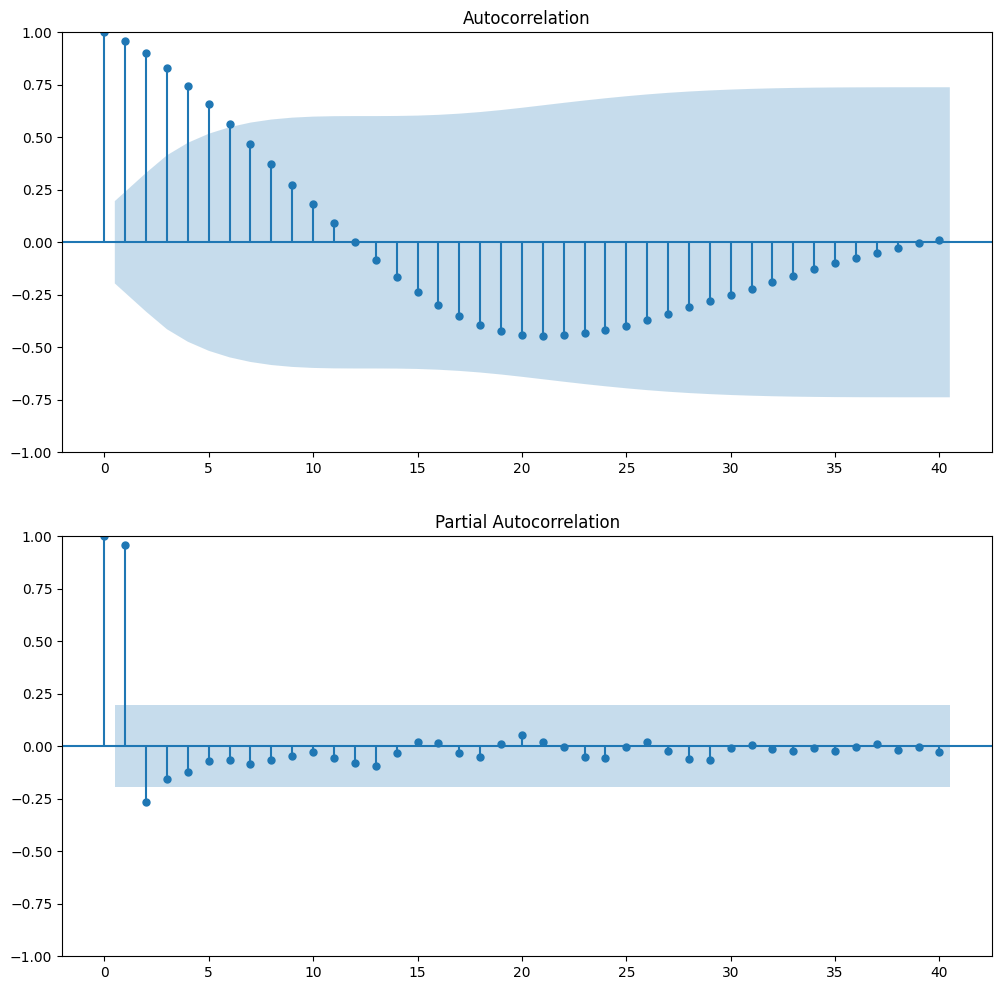

In [10]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=40,ax=ax2)

In [11]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [39]:
autoarima_model = auto_arima(df, trace=True)
# print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=525.569, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1024.556, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1277.994, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=534.021, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.492, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=529.901, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=536.270, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=564.487, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=534.233, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=528.287, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=526.415, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=531.096, Time=0.11 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total 

In [40]:
size = int(len(df) * 0.85)
train = df[:size]
test = df[size:]

In [41]:
model = ARIMA(train, order=(3,0,3))  
fitted = model.fit()
# print(fitted.summary())

c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
# Get confidence intervals for the forecasts
forecast_steps = len(test) 
forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = fitted.forecast(steps=forecast_steps) 
conf_int = forecast_results.conf_int()  # Confidence intervals

In [50]:
# forecast

In [52]:
# lower_series = pd.Series(conf_int['lower value'], index=test.index)
# upper_series = pd.Series(conf_int['upper value'], index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)


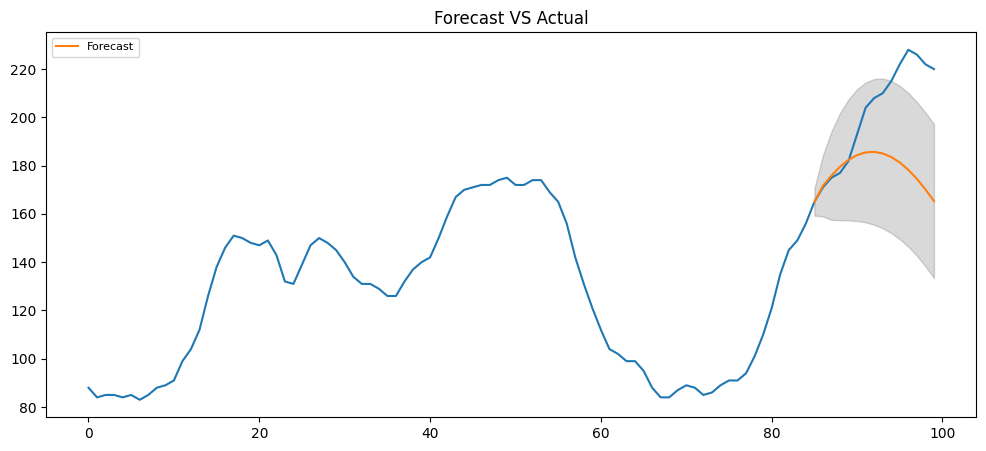

In [54]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(df)
plt.plot(forecast, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Error calculation

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
rmse= sqrt(mean_squared_error(forecast,test))
rmse

31.613272843566584

# Future value prediction


In [23]:
future_df=fitted.predict(start=len(df), end=len(df)+20,dynamic=True)
#  20 ta notun index er jnno value forecast korci

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


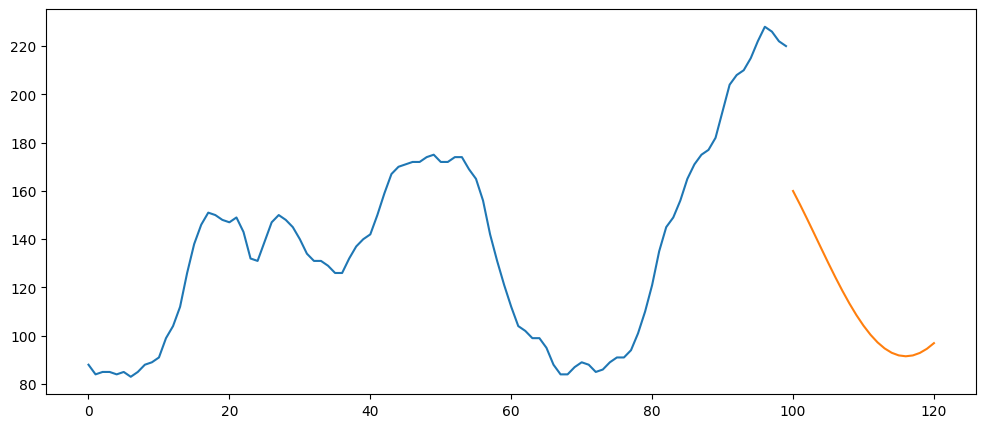

In [24]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original data')
plt.plot(future_df, label='Forecast')

In [ ]:
# forecast_steps = len(test) 
# # forecast_results = fitted.get_forecast(steps=forecast_steps)
# forecast = fitted.forecast(steps=forecast_steps+20) 
# # conf_int = forecast_results.conf_int()

In [ ]:
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='Training')
# plt.plot(test, label='Actual')
# plt.plot(forecast, label='Forecast')